<a href="https://colab.research.google.com/github/v-keerthana/DeepLearning/blob/main/Combined_Tb_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 99% 657M/663M [00:16<00:00, 57.7MB/s]
100% 663M/663M [00:16<00:00, 42.3MB/s]


In [5]:
!kaggle datasets download -d raddar/tuberculosis-chest-xrays-shenzhen

100% 3.51G/3.51G [01:15<00:00, 35.0MB/s]
100% 3.51G/3.51G [01:15<00:00, 49.9MB/s]


In [6]:
!kaggle datasets download -d raddar/tuberculosis-chest-xrays-montgomery

 97% 570M/585M [00:14<00:00, 62.2MB/s]
100% 585M/585M [00:14<00:00, 43.4MB/s]


In [7]:
!kaggle datasets download -d raddar/chest-xrays-tuberculosis-from-india

 80% 27.0M/33.7M [00:01<00:00, 16.2MB/s]
100% 33.7M/33.7M [00:01<00:00, 30.0MB/s]


In [8]:
import zipfile
zf = "/content/tuberculosis-tb-chest-xray-dataset.zip"
target_dir = "/content/dataset/chest-xray"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [9]:
import zipfile
zf = "/content/tuberculosis-chest-xrays-shenzhen.zip"
target_dir = "/content/dataset/china"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [10]:
import zipfile
zf = "/content/tuberculosis-chest-xrays-montgomery.zip"
target_dir = "/content/dataset/US"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [11]:
import zipfile
zf = "/content/chest-xrays-tuberculosis-from-india.zip"
target_dir = "/content/dataset/India"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [12]:
import os
import shutil
import numpy as np
def make_dirs_for_data():
  par_dir="/content/dataset"
  path = par_dir+'/evaluate'
  os.mkdir(path)

  par_dir="/content/dataset/evaluate"
  path = par_dir+'/train'
  os.mkdir(path)

  par_dir="/content/dataset/evaluate"
  path = par_dir+'/test'
  os.mkdir(path)

  par_dir="/content/dataset/evaluate"
  path = par_dir+'/val'
  os.mkdir(path)

  path_of_test = "/content/dataset/evaluate/train" 
  path_of_test_normal = path_of_test+'/Normal'
  path_of_test_Tb = path_of_test+'/Tb'
  os.mkdir(path_of_test_normal)
  os.mkdir(path_of_test_Tb)

  path_of_test = "/content/dataset/evaluate/test" 
  path_of_test_normal = path_of_test+'/Normal'
  path_of_test_Tb = path_of_test+'/Tb'
  os.mkdir(path_of_test_normal)
  os.mkdir(path_of_test_Tb)

  path_of_test = "/content/dataset/evaluate/val" 
  path_of_test_normal = path_of_test+'/Normal'
  path_of_test_Tb = path_of_test+'/Tb'
  os.mkdir(path_of_test_normal)
  os.mkdir(path_of_test_Tb)

  # NORMAL
  source = '/content/dataset/chest-xray/TB_Chest_Radiography_Database/Normal/'
  destination = '/content/dataset/evaluate/train/Normal/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:1555]
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/evaluate/train/Normal/'
  destination = '/content/dataset/evaluate/val/Normal/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:311]
  for f in allfiles:
    shutil.move(source + f, destination + f)
  
  source = '/content/dataset/chest-xray/TB_Chest_Radiography_Database/Normal/'
  destination = '/content/dataset/evaluate/test/Normal/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:100]
  for f in allfiles:
    shutil.move(source + f, destination + f)

  # #TB
  source = '/content/dataset/chest-xray/TB_Chest_Radiography_Database/Tuberculosis/'
  destination = '/content/dataset/evaluate/train/Tb/'
  allfiles = os.listdir(source)
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/India/images/images/'
  destination = '/content/dataset/evaluate/train/Tb/'
  allfiles = os.listdir(source)
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/US/images/images/'
  destination = '/content/dataset/evaluate/train/Tb/'
  allfiles = os.listdir(source)
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/china/images/images/'
  destination = '/content/dataset/evaluate/train/Tb/'
  allfiles = os.listdir(source)
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source ='/content/dataset/evaluate/train/Tb/'
  destination = '/content/dataset/evaluate/test/Tb/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:100]
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/evaluate/train/Tb/'
  destination = '/content/dataset/evaluate/val/Tb/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:311]
  for f in allfiles:
    shutil.move(source + f, destination + f)


  print("train-normal",len(os.listdir('/content/dataset/evaluate/train/Normal')))
  print("train-Tb",len(os.listdir('/content/dataset/evaluate/train/Tb')))
  print("test-normal",len(os.listdir('/content/dataset/evaluate/test/Normal')))
  print("test-Tb",len(os.listdir('/content/dataset/evaluate/test/Tb')))
  print("val-normal",len(os.listdir('/content/dataset/evaluate/val/Normal')))
  print("val-Tb",len(os.listdir('/content/dataset/evaluate/val/Tb')))


In [13]:
make_dirs_for_data()

train-normal 1244
train-Tb 1244
test-normal 100
test-Tb 100
val-normal 311
val-Tb 311


In [14]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [15]:
img_height,img_width = (224,224)
batch_size=32

train_data='/content/dataset/evaluate/train'
val_data='/content/dataset/evaluate/val'
test_data='/content/dataset/evaluate/test'

In [16]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator =train_datagen.flow_from_directory(
    train_data,
    target_size=(img_height, img_width),
    batch_size=batch_size, 
    class_mode='binary'
    # subset='training'
)
val_generator = train_datagen.flow_from_directory(
    val_data,
    target_size=(img_height,img_width),
     batch_size=batch_size,
    class_mode='binary'
    # subset='validation'
    )


Found 2488 images belonging to 2 classes.
Found 622 images belonging to 2 classes.


In [17]:
test_generator =train_datagen.flow_from_directory( test_data, # same directory as training data
                                                 target_size=(img_height, img_width),
                                                 batch_size=1, 
                                                  class_mode='binary' 
                                                  # subset='validation'
                                                  ) 

Found 200 images belonging to 2 classes.


In [18]:
x,y=test_generator.next()
x.shape

(1, 224, 224, 3)

In [19]:
import tensorflow as tf
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                              monitor='val_loss',
                             verbose=1, 
                             save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]


In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model=ResNet50(include_top=False, weights='imagenet')
x=base_model.output
x = GlobalAveragePooling2D() (x)
x=Dense(1024, activation='relu')(x)
# x=Flatten()(x)
predictions=Dense(1, activation='sigmoid')(x) #train_generator.num_classes
model=Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers: 
  layer.trainable=False

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.003), loss="binary_crossentropy", metrics = ['accuracy'])

# history = base_model.fit(train_generator,
#                                   validation_data=val_generator,
#                                   steps_per_epoch=32,  #int(2488/batch_size),
#                                   epochs=15,
#                                   verbose=1,
# )                      
model.fit(train_generator,validation_data=val_generator,epochs = 10,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
78/78 [==============================] - 158s 2s/step - loss: 0.8967 - accuracy: 0.8436 - val_loss: 0.1660 - val_accuracy: 0.9293
Epoch 2/10
78/78 [==============================] - 148s 2s/step - loss: 0.1544 - accuracy: 0.9369 - val_loss: 0.2038 - val_accuracy: 0.9100
Epoch 3/10
78/78 [==============================] - 148s 2s/step - loss: 0.1040 - accuracy: 0.9578 - val_loss: 0.1122 - val_accuracy: 0.9630
Epoch 4/10
78/78 [==============================] - 146s 2s/step - loss: 0.1014 - accuracy: 0.9626 - val_loss: 0.0863 - val_accuracy: 0.9695
Epoch 5/10
78/78 [==============================] - 143s 2s/step - loss: 0.1016 - accuracy: 0.9594 - val_loss: 0.0785 - val_accuracy: 0.9662
Epoch 6/10
78/78 [==============================] - 147s 2s/step - loss: 0.1087 - accuracy: 0.9590 - val_loss: 0.1693 - val_accuracy: 0.9421
Epoch 7/10
78/78 [==============================] - 148s 2s/step - loss: 0.1051 - accuracy: 0.9626 - val_loss: 0.0629 - val_accuracy: 0.9695
Epoch 8/10
78

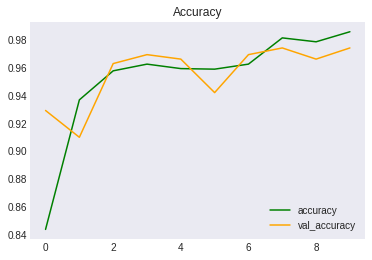

In [33]:
import ctypes
# ctypes.cast(0x7ffa1bb2e650,ctypes.py_object).value
history = ctypes.cast(0x7ffa1bb2e650,ctypes.py_object).value
plt.style.use("seaborn-dark")
plt.title("Accuracy")
plt.plot(history.history['accuracy'],label="accuracy",c='green')
plt.plot(history.history['val_accuracy'],label="val_accuracy",c='orange')
plt.legend()
plt.show()
# history

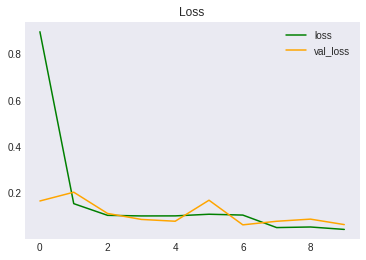

In [34]:
plt.style.use("seaborn-dark")
plt.title("Loss")
plt.plot(history.history['loss'],label="loss",c='green')
plt.plot(history.history['val_loss'],label="val_loss",c='orange')
plt.legend()
plt.show()

In [35]:
test_loss,test_accuracy= model.evaluate(test_generator,verbose=2)

200/200 - 18s - loss: 0.0595 - accuracy: 0.9750 - 18s/epoch - 90ms/step
